In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load and Check Data

In [57]:
# load data
data = pd.read_excel('../data/Initial dataset.xls')
data

,WC(wt%),CO(wt%),Mo(wt%),Ni(wt%),Ti(wt%),W(wt%),C(wt%),O(wt%),Cl(wt%),Fe(wt%),...,Cr(wt%),Si(wt%),Mn(wt%),Vn(wt%),particle size,temperature,density,HV,HRA,KIC
0,95.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.00,1475.0,13.90,0.0,0.0,18.80
1,95.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.00,1600.0,14.16,0.0,0.0,18.75
2,75.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.00,1600.0,13.08,0.0,0.0,11.52
3,85.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.00,1600.0,13.35,0.0,0.0,12.50
4,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.00,1475.0,3.45,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13210,15.0,0.0,15.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.00,1440.0,6.26,0.0,91.0,8.50
13211,15.0,0.0,15.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.00,1440.0,6.25,0.0,92.5,9.80
13212,15.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.00,0.0,0.00,1575.3,0.0,10.48
13213,15.0,0.0,15.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.35,1420.0,7.07,0.0,91.6,9.50


In [58]:
# deduplication
data = data.drop_duplicates()
data.duplicated().sum()

0

# PCA

In [36]:
# Remove performance-related data
data_pca = data.drop(columns=['HV','HRA','KIC'])
data_pca = data_pca.fillna(0)
array_pca = np.array(data_pca)

In [37]:
pca = PCA(n_components=1) 
pca.fit(data_pca)
var_ratio = pca.explained_variance_ratio_
for idx, val in enumerate(var_ratio, 1):print("Principle component %d: %.2f%%" % (idx, val * 100))
print("total: %.2f%%" % np.sum(var_ratio * 100))

Principle component 1: 99.30%
total: 99.30%


In [47]:
# By calculating the sum of the absolute values of the coefficients of 
# each original feature in the principal component
# the final contribution of the feature is as follows:
feature_importance = np.abs(pca.components_) 
feature_importance_sum = np.sum(feature_importance, axis=0)
ranking_df = pd.DataFrame({'feature': data_pca.columns, 'contribution': feature_importance_sum})
ranking_df = ranking_df.sort_values(by='contribution')

# Save the results as Excel for later use
df_pca = pd.DataFrame(ranking_df)
df_pca.to_excel("../data/PCA_result.xlsx")

# PCC

In [48]:
# Remove performance-related data when PCA
# keep only the properties that need to be studied
data_pcc_hv = data.drop(columns=['HRA','KIC'])
data_pcc_hv = data_pcc_hv.fillna(0)
data_pcc_kic = data.drop(columns=['HV','HRA'])
data_pcc_kic = data_pcc_kic.fillna(0)

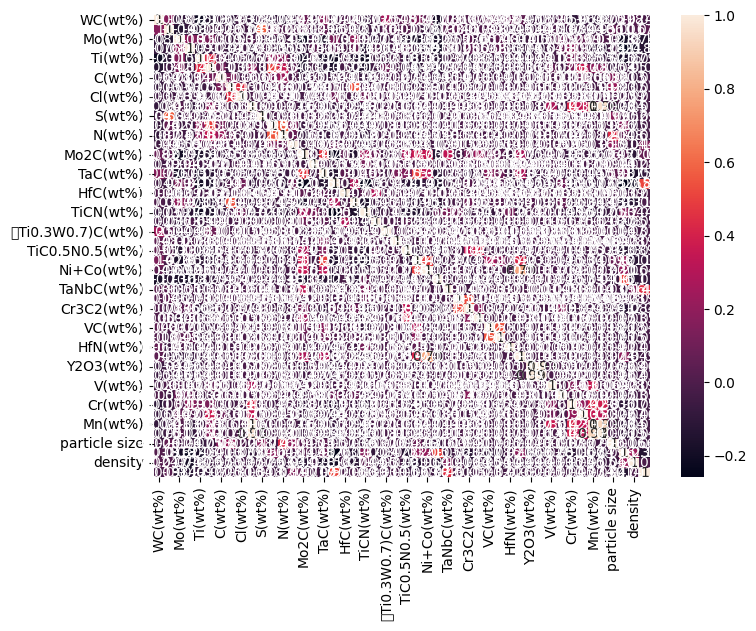

In [50]:
# PCC for HV
corr_hv = data_pcc_hv.corr()
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(data=corr_hv, annot=corr_hv, ax=ax);

In [43]:
# Save for later use
corr_hv.to_excel("../data/PCC_HV_result.xlsx")

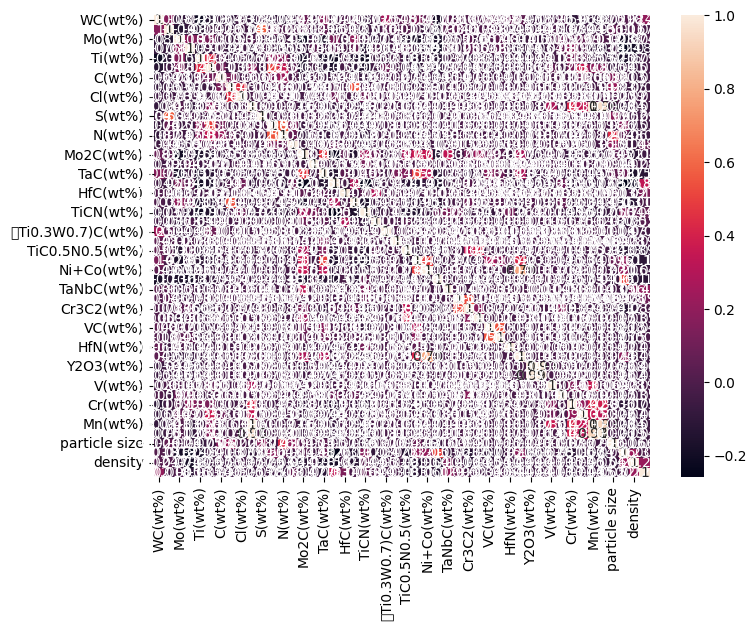

In [51]:
# PCC for KIC
corr_kic = data_pcc_kic.corr()
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(data=corr_kic, annot=corr_kic, ax=ax);

In [45]:
# Save for later use
corr_hv.to_excel("../data/PCC_KIC_result.xlsx")